<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/Augmented_DF_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stationarity in time-series data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log


In [6]:
plt.rcParams['figure.figsize'] = (10,7)

Text(0, 0.5, 'Births')

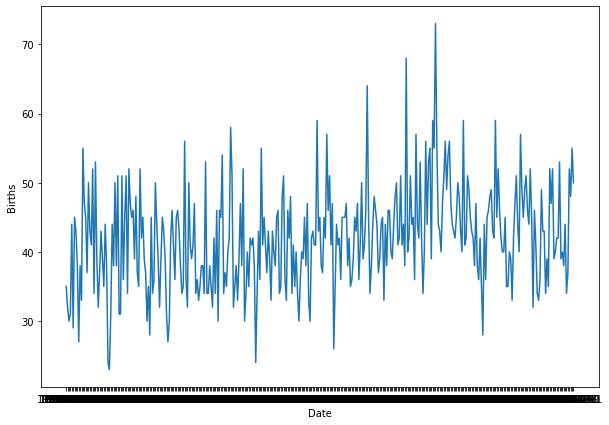

In [10]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)


plt.plot(series);
plt.xlabel(xlabel='Date')
plt.ylabel(ylabel='Births')


In [11]:
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### Airline Passengers

In [17]:
seriesA = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)

seriesA.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


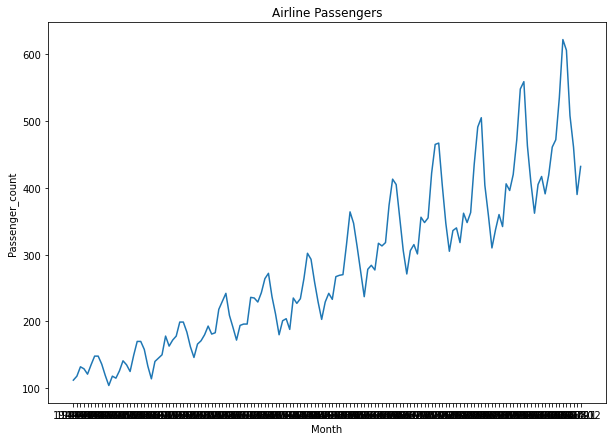

In [50]:
# plot

plt.plot(seriesA)
plt.xlabel('Month')
plt.ylabel('Passenger_count')
plt.title('Airline Passengers');



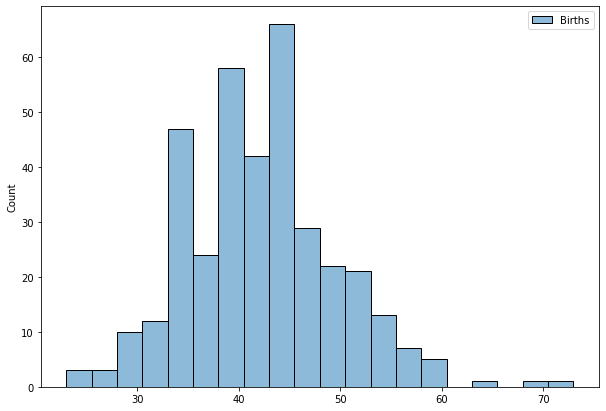

In [39]:
# plot births histogram

sns.histplot(series);

In [23]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


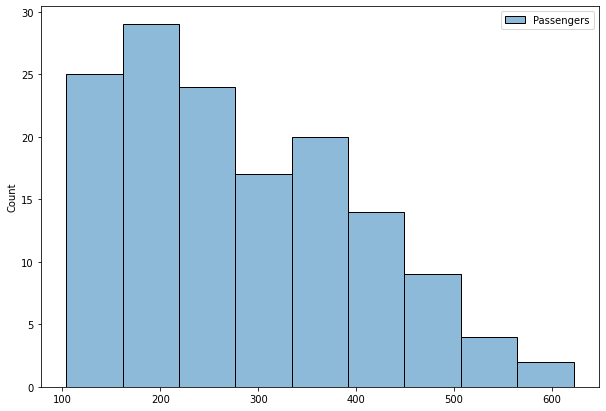

In [43]:
# plot airline passengers histogram

XA = seriesA.values
split = int(len(XA) / 2)
X1A, X2A = XA[0:split], XA[split:]
mean1, mean2 = X1A.mean(), X2A.mean()
var1, var2 = X1A.var(), X2A.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

sns.histplot(seriesA);

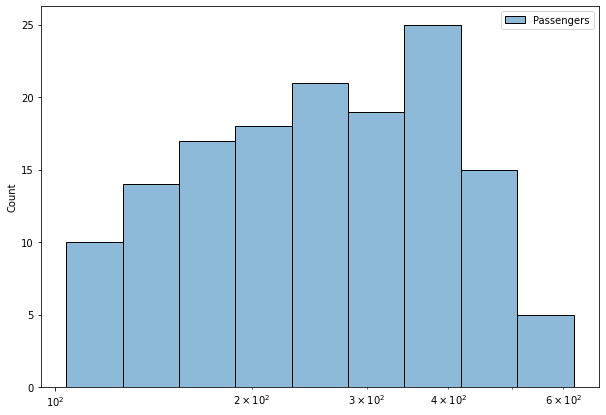

In [45]:
sns.histplot(seriesA, log_scale=True)

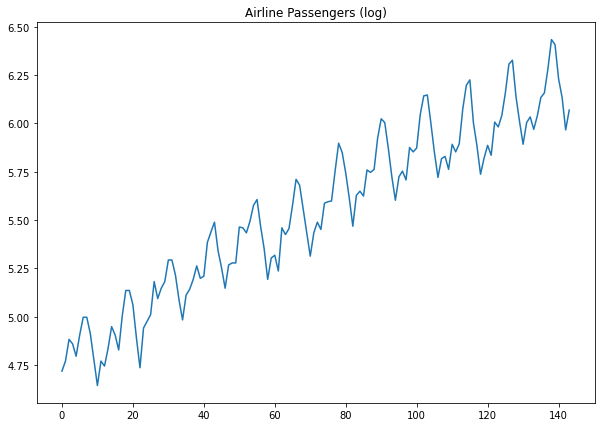

In [49]:
# transform airling passengers data

X_log = log(XA)
plt.plot(X_log)
plt.title('Airline Passengers (log)');

In [51]:
# calculate statistics of log transformed data

split = round(len(X_log) / 2)
X1, X2 = X_log[0:split], X_log[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('(log) mean1=%f, (log) mean2=%f' % (mean1, mean2))
print('(log) variance1=%f, (log) variance2=%f' % (var1, var2))

(log) mean1=5.175146, (log) mean2=5.909206
(log) variance1=0.068375, (log) variance2=0.049264


In [54]:
# pip install statsmodels

In [60]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [72]:
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [76]:
# female births data check

result = adfuller(series['Births'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [78]:
# airline passengers data check

result_A = adfuller(seriesA['Passengers'])
print('ADF Statistic: %f' % result_A[0])
print('p-value: %f' % result_A[1])
print('Critical Values:')

for key, value in result_A[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [79]:
# airline passengers log data check

result_log = adfuller(log(seriesA['Passengers']))
print('ADF Statistic: %f' % result_log[0])
print('p-value: %f' % result_log[1])
print('Critical Values:')

for key, value in result_log[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
